# Assignment 7: Intro To Keras With Feed Forward NNs and Theory Recap

### PART I - THEORY RECAP

Answer the following review questions below. The questions are based off material seen in previous lectures/assignments, but some concepts were only briefly mentioned! If you can't find an answer from the lecture slides, a quick search online should be very helpful (i.e. always search online first before panicking :) )

### 1) Linear vs Polynomial Regression
- Describe both Linear Regression and Polynomial Regression (3 lines or less each).

- Describe overfitting vs underfitting with respect to parameters.  


In [1]:
### YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

Linear regression maps a feature space to a continuous output by assuming the data distribution is inherently linear with some Gaussian noise. Hence, the output of the regression model is linear with respect to its features, e.g. $y = m_0 + m_1 x_1 + m_2 x_2 + ... + m_n x_n$

Polynomial regression is similar to linear regression, as it also maps your feature space to a continuous output, but we attempt to model the data distribution using a polynomial function rather than an affine/linear model, e.g. $y = m_0 + m_1 x_1 + m_2 x_2^2 + m_2 x_2^2 + ... + m_n x_n^n$

Overfitting vs Underfitting: We investigate the case where we think our feature space can be augmented using a polynomial kernel, that is, if our feature space is $x$, we assume $f(x) = m_0 + m_1 x + m_2 x^2 + m_3 x^3 + ... + m_n x^n$. Since the polynomial degree $n$ is unknown, we attempt to fit our data using different $n$s. If $n_{hypothesis} < n_{true}$, then the model fails to capture the complexity of the data. This is denoted as *underfitting*.  On the other hand, if the hypothesized $n_{hypothesis} > n_{true}$, then we end up capturing too much noise from over-complexity of the model: *overfitting*. One may use regularization techniques to penalize the complexity of the model and regularize weights. A basic overview can be found here:
https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

### 2) Logistic Regression vs. Linear SVM
- Describe how logistic regression works (3 lines or less)
- Describe how linear SVM works. Mention the role(s) of:
    - support vectors
    - margin
    - slack variables
    - kernels
- Plot an example for SVM where the linear kernel is not enough to separate the data, but another kernel works

In [2]:
## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

**Logistic Regression** 
Logistic Regression is actually a classification model that maps a linear model that best fits a set of data points, where we use a thresholding function called a sigmoid function to determine which class each data point should be. 

**Linear SVM**
Linear SVM can be used for regression, but is mostly used for classification tasks. Our objective is to find a hyperplane (boundary) that has the maximum margin, i.e the maximum distance between data points of two classes. 

Support vectors are data points that are closest to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane.

These are the points that help us build our SVM. If there exists no hyperplane that perfectly separates the classes, we may use what we call slack variables, that soften the misclassification cost of a datapoint.

Kernels are, at a high level, any function $K$ which corresponds to a dot product for some feature mapping $\phi $, such that $K(x_1, x_2) = \phi (x_1) . \phi(x_2)$ . Instead of trying to directly find a hyperplane that separates the original feature space (corresponds to using a linear kernel), we attempt to find the optimal hyperplane on an alternate feature space, i.e. from $X \rightarrow \phi(X)$. Since to compute the hyperplane, we need to apply the dot product, we use an equivalent kernel that would be more efficient than computing a dot product between two transformed points, i.e. it's easier to compute $K(x_1, x_2)$ than $\phi (x_1) . \phi(x_2)$.

### 3) Linear SVM vs k-NN
- K-Nearest Neighbours is a popular unsupervised learning algorithm. Explain the difference between supervised and unsupervised learning?
- K-NN is an example of a lazy learning algorithm. Why is it called so. What could be a use case? Justify using a lazy learning algorithm in that case.
- Outline the main steps for the KNN algorithm. Use text, code, plots, diagrams, etc as necessary.  
- Plot a example dataset which works in an SVM classification and not k-NN classification. Repeat for the reverse scenario.

In [3]:
## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

**Supervised Learning**
Supervised learning encompasses classification and regression tasks. For both, we are provided both the features and the labels/ target variables. In the case of classification, we wish to map our feature space to a discrete output, whereas the output of regression is continuous.

**Unsupervised Learning**
The most common tasks within unsupervised learning are clustering, representation learning, and density estimation. In all of these cases, we wish to learn the inherent structure of our data without using explicitly-provided labels.

**k Nearest Neighbours**
Given a dataset $X$, define a distance metric $d$ , e.g. Euclidean distance. There is no training involved. At prediction time, we wish to label $x_{test}$ by iterating through the points in $X$. We find the $k$ closest points (defined by $d$) in $X$ to $x_{test}$ and classify it based on a majority vote (based on $k$ neighbours, which class is the most common?).

**Lazy Learners**
Lazy learning is a learning method in which generalization of the training data is, in theory, delayed until a query is made to the system, as opposed to in eager learning, where the system tries to generalize the training data before receiving queries. For example, the logistic regression algorithm learns its model weights (parameters) during training time. In contrast, there is no training time in K-NN. Although this may sound very convenient, this property doesn’t come without a cost: The “prediction” step in K-NN is relatively expensive! Each time we want to make a prediction, K-NN is searching for the nearest neighbor(s) in the entire training set.

### 5) Ensemble Methods
- Explain bagging and boosting. Clearly illustrate the difference between these methods. When would you use either one?
- What is a decision tree? What is a random forest? Compare them and list 3 pros and cons of each?

In [4]:
## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

Ensemble methods, as a whole, is the method of building complex classifiers from simple ones. We wish to run one or more base learning algorithms multiple times, then combine the predictions of the different learners to get a final prediction.

**Bagging**
We construct several classifiers independently (in parallel), and give each classifier a slightly randomized subset of the original dataset (sample with replacement, aka bootstrapping) Then, at prediction time, we use a majority vote to decide which class the test data belongs to. In regression tasks, we take the average prediction from each classifier. More information on bootstrapping can be found here: https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/

**Boosting**
We sequentially build a complex classifier, by feeding the output of one classifier into the next, re-weighting the training examples from the previous classifier. More weight is put on examples that were misclassified. A high-level algorithm is provided below.

1. Use the training set to train a simple predictor.
2. Re-weight the training examples, putting more weight on examples that were not properly classified in the previous predictor
3. Repeat n times.
4. Combine the simple hypotheses into a single, accurate predictor.

**Decision Trees vs Random Forests**
Decision trees are classification algorithms that classify data points based on test-splits at each node of the tree. Geometrically, this partitions the dataset via orthogonal splits along the feature space's axes. Random forests are simply a collection of decision trees (bagging method), where each tree learns what features to split on via slightly different, randomized subsets of the original feature space.

**Decision Tree Pros/Cons**
* Interpretable/ reproducible
* Faster
* Prone to overfitting (high variance)
* Greedy algorithm, so might not find global optima that reduces error since it looks for the optimal test node-by-node

**Random Forests Pros/Cons**
* reduce variance, so less overfitting
* less sensitve to noise
* Less interpretable than decision trees

### 6) PCA
- Describe how PCA achieves dimensionality reduction. Outline the main steps of the algorithm
- What is the importance of eigenvectors and eigenvalues in the PCA algorithm above.
- When we compute the covariance matrix in PCA, we have to subtract the mean. Why do we do this?

In [5]:
## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

**PCA for Dimensionality Reduction**
PCA attempts to project an original feature space $X$ of dimension $n$ to a linear subspace of dimension $n'$, where $n' < n$. This is done by computing the eigenvectors of the covariance matrix of $X$, $\Sigma(X)$. We then project $X$ onto the $n'$ eigenvectors of $\Sigma$ with the highest variance. 

**Eigenvalues and eigenvectors**
The eigenvectors from $\Sigma$ correspond to the directions along which we have the highest variance, so we wish to project our feature space onto these eigenvectors. To find the highest variance, we look at the corresponding eigenvalues.

**Why do we subtract the mean?**
As described in previous lectures, the variance of a given variable is defined with respect to its distribution's mean. Hence, we get rid of the mean for all variables to center our data at the origin, which also conveniently reduces our covariance matrix equation. From this, we can directly read off the eigenvectors and eigenvalues of our "cleaned" covariance matrix.

### PART II - INTRODUCTION TO THE KERAS LIBRARY

In the following, we will be introduced to the [Keras Deep Learning Library](https://keras.io/). The library is a high-level API to get you started with building your own neural networks! In this tutorial, we'll be building a feed-forward neural network, and in the next assignment you'll build different CNN architectures.

The essence of Keras revolves around different Keras **models**. The simplest type of model is the ```Sequential``` model, a **linear** stack of layers. For more complex architectures, you should use the [Keras functional API](https://keras.io/getting-started/functional-api-guide/), which allows to build arbitrary graphs of layers.

Below are a few of the key commands to get you started right away!

To get rid of some warning logs, you can run the following helper method:

In [6]:
# Run cell to get rid of some warnings later on

def noWarnings():
    import os
    os.environ['TF_CPP_MIN_VLOG_LEVEL'] = '0'
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'
    from tensorflow import logging
    logging.set_verbosity(logging.INFO)

###### 1) Create a Sequential model

In [7]:
from keras.models import Sequential

model = Sequential()

Using TensorFlow backend.
W0716 01:54:02.995523 140039665289024 deprecation_wrapper.py:119] From /root/anaconda3/envs/yourenvname/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



###### Stacking Layers

Stacking layers is as easy as ```.add()```:

Note that for the first layer, we must specify the ```input_dim``` parameter since the first layer of a linearly stacked neural network feeds each input feature to its respective neuron.

You must also specify the number of units per layer, as well as specify an activation function.

###### 2) Add 2 layers to the model.

- an input layer of 64 neurons using the ReLU activation function, with input dimension of 100
- a layer of 10 units with the softmax activation function (output layer)

In [8]:
from keras.layers import Dense

model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))

W0716 01:54:03.035569 140039665289024 deprecation_wrapper.py:119] From /root/anaconda3/envs/yourenvname/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 01:54:03.043867 140039665289024 deprecation_wrapper.py:119] From /root/anaconda3/envs/yourenvname/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



###### 3) Specify the model's learning process

Before training, we have to use the ```.compile()``` method which specifies the model's learning process. To create a learning process, the following parameters need to be specified:

- a loss function, e.g. categorical cross entropy for multiclass classification
- an optimization method, e.g. stochastic gradient descent
- a metric to optimize for, e.g. accuracy for classification

**TIP**: custom loss functions can be daunting (typically specific tasks will have their own custom loss functions), the [Keras Losses Documentation](https://keras.io/losses/) shows a few loss functions available in the API, read up online to see if the loss function is suitable for the task at hand.

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

W0716 01:54:03.141942 140039665289024 deprecation_wrapper.py:119] From /root/anaconda3/envs/yourenvname/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0716 01:54:03.179605 140039665289024 deprecation_wrapper.py:119] From /root/anaconda3/envs/yourenvname/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



If you need to, you can further configure your optimizer!

In [10]:
from keras.losses import categorical_crossentropy
from keras.optimizers import SGD

model.compile(loss=categorical_crossentropy,
              optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))

###### 4) You can now iterate on your training data in batches (following code will not run unless you specify X_train, y_train)

Note the similarity with sklearn's ```.fit()``` command to train a model! Note that the ```epochs``` parameter denotes the number of times the model will pass over the training set during the training phase ([More info here](https://keras.io/getting-started/faq/#what-does-sample-batch-epoch-mean))

```

# X_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
model.fit(X_train, y_train, epochs=5, batch_size=32)

```

##### 5) Evaluating Model Performance

To evaluate model performance, use the ```.evaluate()``` command:

```

loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)

```

###### 6) ...or make new predictions on test data!

Use the ```.predict()``` command:

```

classes = model.predict(x_test, batch_size=128)

```

### PART III - Building a Deep Neural Network for Multiclass Classification

Let's take a look at a multi-class classification problem, picking 3 classes for demonstration, but our approach generalizes to any number of classes.

To see how deep neural networks are helpful compared to other traditional supervised learning algorithms, we'll be inspecting a dataset that is not linearly separable. We'll then try to solve the problem using **softmax** regression in Keras, which is extremely similar to logistic regression, but is used for multiclass problems.

We'll then attempt to tackle the same problem using a neural network.

###### 1) Import the following libraries for this exercise

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from keras.utils.np_utils import to_categorical
from matplotlib.colors import ListedColormap

###### 2) Some helper methods

Here are some helper methods to generate datasets and to help create visually appealing plots.

In [12]:
def make_multiclass(N=500, D=2, K=3):
    """
    N: number of points per class
    D: dimensionality
    K: number of classes
    """
    np.random.seed(0)
    X = np.zeros((N*K, D))
    y = np.zeros(N*K)
    for j in range(K):
        ix = range(N*j, N*(j+1))
        # radius
        r = np.linspace(0.0,1,N)
        # theta
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    fig = plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    return X, y

def plot_multiclass_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
    cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    Z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()], verbose=0)
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['acc'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

def plot_confusion_matrix(model, X, y):
    y_pred = model.predict_classes(X, verbose=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)

###### 3) Plot the data generated.

Inspect the shape of X, y.

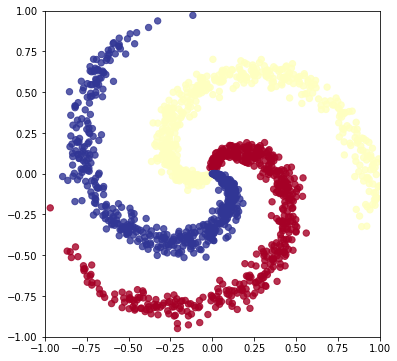

In [13]:
X, y = make_multiclass(K=3)

In [14]:
print(X.shape)
print(y.shape)

(1500, 2)
(1500,)


###### 4) Building a Logistic Regression Model as a Reference to a Softmax Regression Model

Recall the Logistic Regression supervised learning algorithm for binary classification problems. As the problem states, LR works with binary labels 0/1. Softmax Regression (SR) is a generalization of LR where we can have more than 2 classes. In our current dataset we have 3 classes, represented as 0/1/2.

Building the model for SR is very similar to LR, for reference here's how a **LR model** is built:

```

model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, verbose=0, epochs=20)

```


###### 5) Building a Softmax Regression Model

The core idea of building the softmax regression model in Keras is very similar to the LR model in the sample code above. Let's go over a few of the differences to consider when implementing SR for multiclass classification:

- **Number of nodes in the dense layer:** LR uses 1 node, while SR uses 3. Since we have 3 classes, it intuitively makes sense for SR to have 3 nodes. Then the question is, why does LR uses only 1 node for 2 classes?

The answer is simply because we can achieve the same result with using only 1 node. Recall from previous lectures, LR models the probability of an example belonging to class one: $P(y=1)$. We know the sum of the probabilities in a probability distribution is always 1, so we can calculate class 0 probability by: $1 - P(y=1)$. But when we have more than 2 classes, we need individual nodes for each class (knowing the probability of one class doesn't let us infer the probability of the other classes).


- **Activation function:** LR used sigmoid activation function, SR uses *softmax*. It scales the probability of the output neurons such that they sum up to 1. So in our case $P(y=0) + P(y=1) + P(y=2) = 1$. For now you can simply think of it as a normalization function which let's us interpret the output values as probabilities.

- **Loss function:** In a binary classification problem like LR, the loss function is binary_crossentropy. In the multiclass case like SR, the loss function is categorical_crossentropy. Going into the theory behind loss functions is beyond the scope of this tutorial.

- **Fitted data:** LR used the vector y directly in the fit function, which has just one column with binary 0/1 values. When we're applying SR the labels need to be in *one-hot* representation. In our case y_cat is a matrix with 3 columns, where all the values are 0 except for the one that represents our class, which is set to 1 instead (Hint: check the imports)


Note: recall that LR is a linear classifier, and so is SR, but for multiple classes. Hence, the "power" of the model hasn't changed, it is simply the multiclass extension of LR.

When trained correctly, the model gives us an accuracy of around 50%, because the dataset is not linearly separable.

**Train an SR model on the dataset generated above.**

In [15]:
### YOUR CODE HERE - Create a sequential model for SR

noWarnings()
model = Sequential()
model.add(Dense(3, input_shape=(2,), activation='softmax'))

model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

### YOUR CODE HERE - Train the model on one-hot encoded target labels
y_cat = to_categorical(y)
history = model.fit(X, y_cat, verbose=0, epochs=20)

W0716 01:54:05.616423 140039665289024 deprecation.py:323] From /root/anaconda3/envs/yourenvname/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0716 01:54:05.703345 140039665289024 deprecation_wrapper.py:119] From /root/anaconda3/envs/yourenvname/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



###### 6) Plot the loss accuracy, decision boundaries learned by the model

<Figure size 576x432 with 0 Axes>

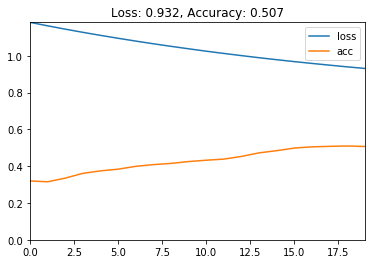

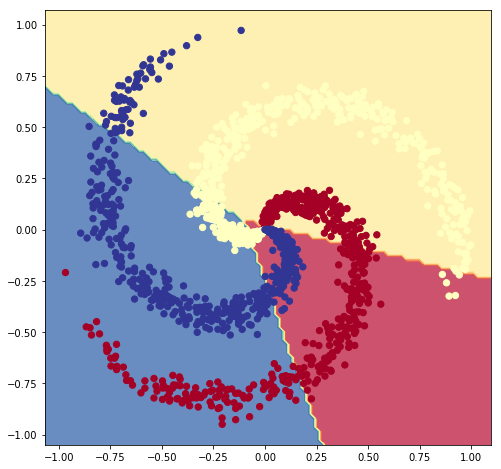

In [16]:
### YOUR CODE HERE - Plot loss accuracy of your model using the plot_loss_accuracy helper method
plot_loss_accuracy(history)

### YOUR CODE HERE - Plot decision boundaries learned using the multi_class_decision_boundary helper method
plot_multiclass_decision_boundary(model, X, y)

###### 7) Make predictions on X, then evaluate how the algorithm does using classification metrics

- Use the ```.predict_classes()``` method to generate predictions
- Print out metrics using the ```classification_report``` module
- Print out the confusion matrix of the model using the ```confusion_matrix``` helper method

              precision    recall  f1-score   support

         0.0       0.42      0.31      0.36       500
         1.0       0.55      0.67      0.60       500
         2.0       0.53      0.55      0.54       500

   micro avg       0.51      0.51      0.51      1500
   macro avg       0.50      0.51      0.50      1500
weighted avg       0.50      0.51      0.50      1500



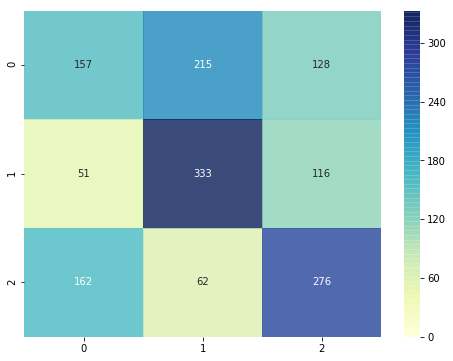

In [17]:
### YOUR CODE HERE - Evaluate SR performance

y_pred = model.predict_classes(X, verbose=0)
print(classification_report(y, y_pred))
plot_confusion_matrix(model, X, y)

### DEEP NEURAL NETWORK

To build a deep neural network, we only need to add more Dense layers. To make learning easier for the network, we'll try adding a couple of Dense layers with tanh activation function, and decrease number of nodes per layer.

To build a more powerful model that can learn non-linearly separable data, we add more layers with non-linear activation functions. Build a classification model in Keras with:

- a densely connected layer with 128 units, 'tanh' activation function
- a densely connected layer with 64 units, 'tanh' activation function
- a densely connected layer with 32 units, 'tanh' activation function
- a densely connected layer with 16 units, 'tanh' activation function
- a densely connected layer with 3 units, 'softmax' activation function

Train your model on the same dataset, defining the learning process similarly to the LR sample code. How many epochs are required to train an accurate model?

###### 8) Build a deep NN model using Keras, fit it on the dataset

In [18]:
### YOUR CODE HERE - Build a Deep Neural Network model and compile it

model = Sequential()
model.add(Dense(128, input_shape=(2,), activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(3, activation='softmax'))

model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

### YOUR CODE HERE - Fit data on training set

y_cat = to_categorical(y)
history = model.fit(X, y_cat, verbose=True, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8333 - acc: 0.5267
Epoch 2/50
1500/1500 [==============================] - 0s 85us/step - loss: 0.7277 - acc: 0.5673
Epoch 3/50
1500/1500 [==============================] - 0s 83us/step - loss: 0.6576 - acc: 0.6607
Epoch 4/50
1500/1500 [==============================] - 0s 87us/step - loss: 0.5570 - acc: 0.7413
Epoch 5/50
1500/1500 [==============================] - 0s 80us/step - loss: 0.4513 - acc: 0.8353
Epoch 6/50
1500/1500 [==============================] - 0s 80us/step - loss: 0.3430 - acc: 0.9213
Epoch 7/50
1500/1500 [==============================] - 0s 80us/step - loss: 0.2499 - acc: 0.9413
Epoch 8/50
1500/1500 [==============================] - 0s 83us/step - loss: 0.1786 - acc: 0.9687
Epoch 9/50
1500/1500 [==============================] - 0s 88us/step - loss: 0.1276 - acc: 0.9740
Epoch 10/50
1500/1500 [==============================] - 0s 82us/step - loss: 0.0911 - acc: 0.9827
Epoch 11/50
1500/150

###### 9) Plot the loss accuracy, decision boundaries learned by the model

<Figure size 576x432 with 0 Axes>

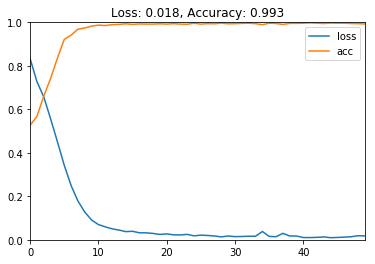

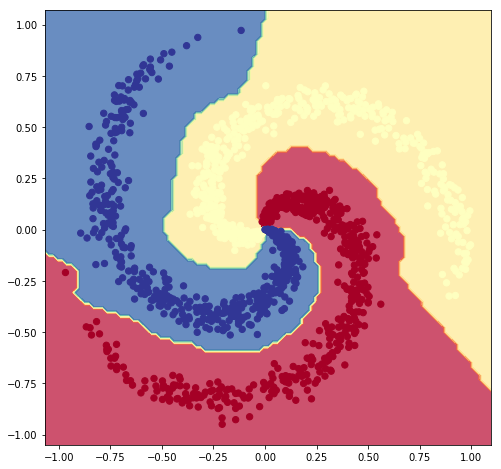

In [19]:
### YOUR CODE HERE - Plot loss accuracy of your model using the plot_loss_accuracy helper method
plot_loss_accuracy(history)

### YOUR CODE HERE - Plot decision boundaries learned using the multi_class_decision_boundary helper method
plot_multiclass_decision_boundary(model, X, y)

###### 10) Make predictions on X, then evaluate how the algorithm does using classification metrics

- Use the ```.predict_classes()``` method to generate predictions
- Print out metrics using the ```classification_report``` module
- Print out the confusion matrix of the model using the ```confusion_matrix``` helper method

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       500
         1.0       1.00      1.00      1.00       500
         2.0       1.00      0.99      1.00       500

   micro avg       1.00      1.00      1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



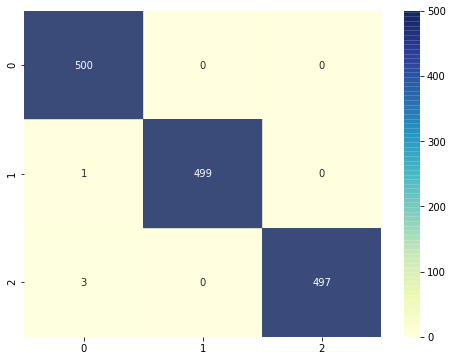

In [20]:
### YOUR CODE HERE - Evaluate SR performance

y_pred = model.predict_classes(X, verbose=0)
print(classification_report(y, y_pred))
plot_confusion_matrix(model, X, y)

###### 11) Comment on model performance.

Compare the SR classification performance compare to the ANN's using the classification metrics, loss, etc. Does the neural network perform better? Why?

In [21]:
## ========== YOUR ANSWER HERE ========= ##